## Remove the outliers from the dataset

Carry out an analysis of the dataset features to identify and remove outlier values

The following steps were carried out

- 1 Check and visualise the data points for each feature
- 2 Remove the outliers from each feature
- 3 Review the dataset after the outliers have been removed

### 1 Check and visualise the data points for each feature

In [20]:
#check the dataset size prior to checking for outliers

new_dataset.shape

(23770, 14)

In [21]:
#check for outliers in dataset features

# Boxplot to visualize Data using a function 

def boxplot(new_dataset,feature):
    new_dataset.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

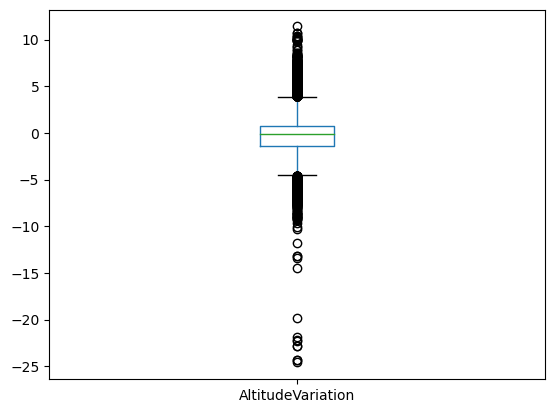

None


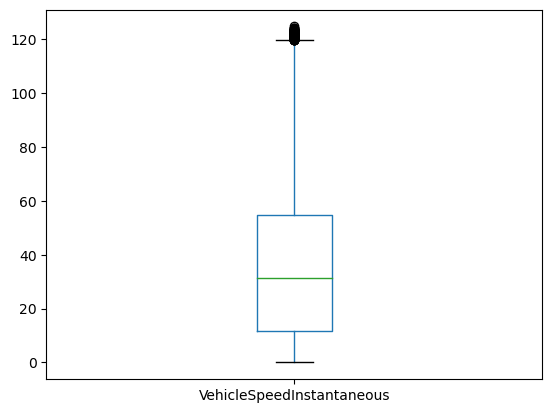

None


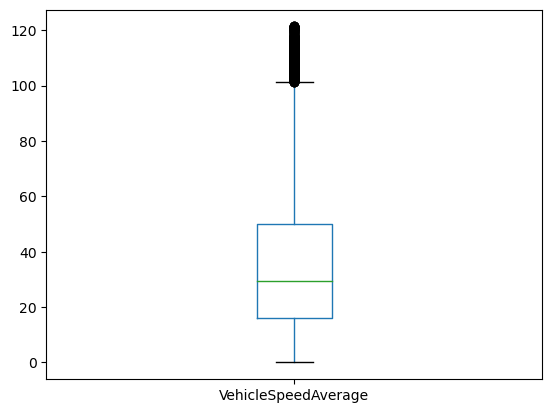

None


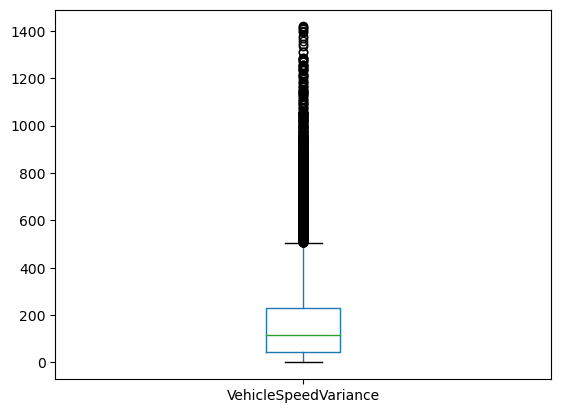

None


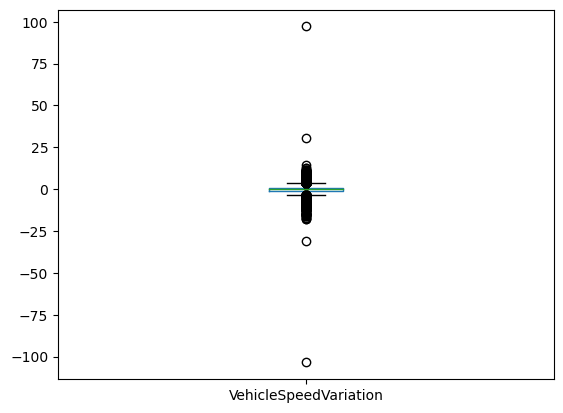

None


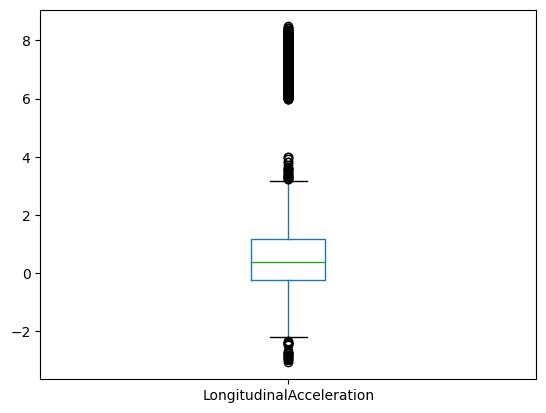

None


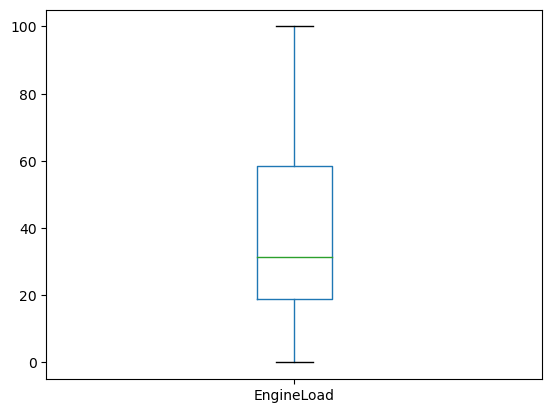

None


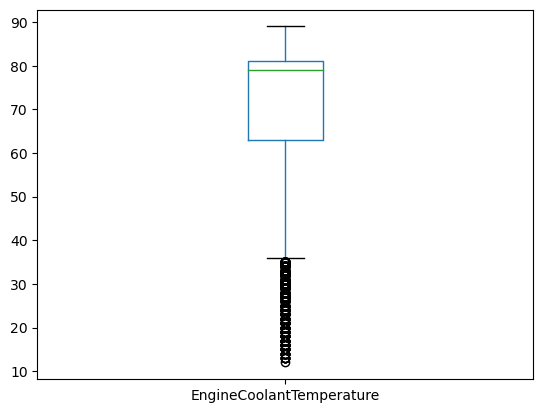

None


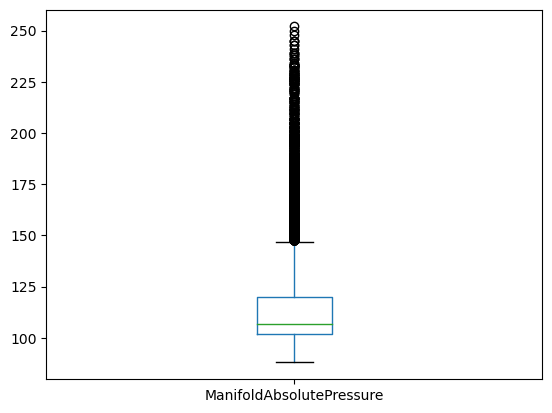

None


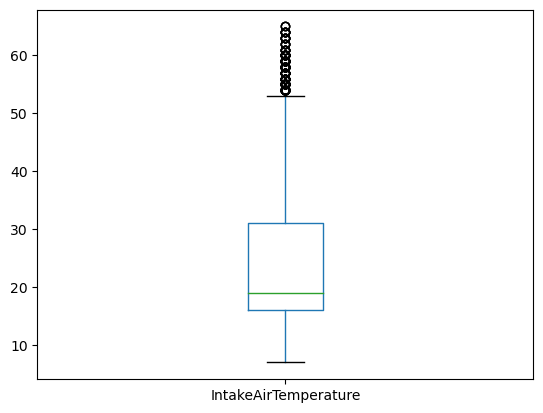

None


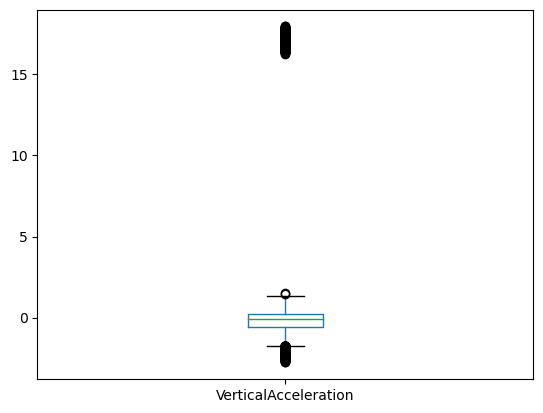

None


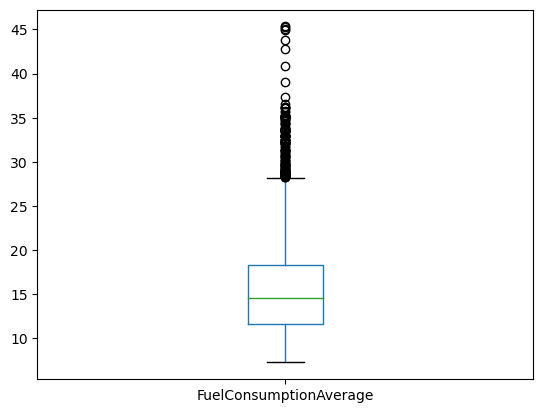

None


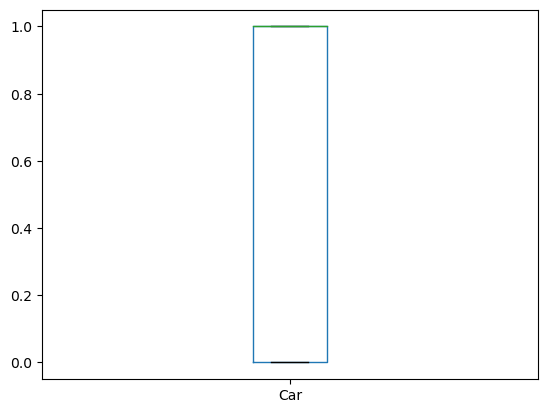

None


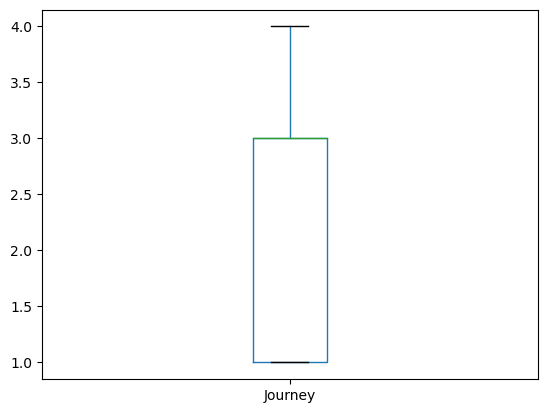

None


In [22]:
#create boxplots for each feature to show outliers

for feature in new_dataset:
    print(boxplot(new_dataset,feature))

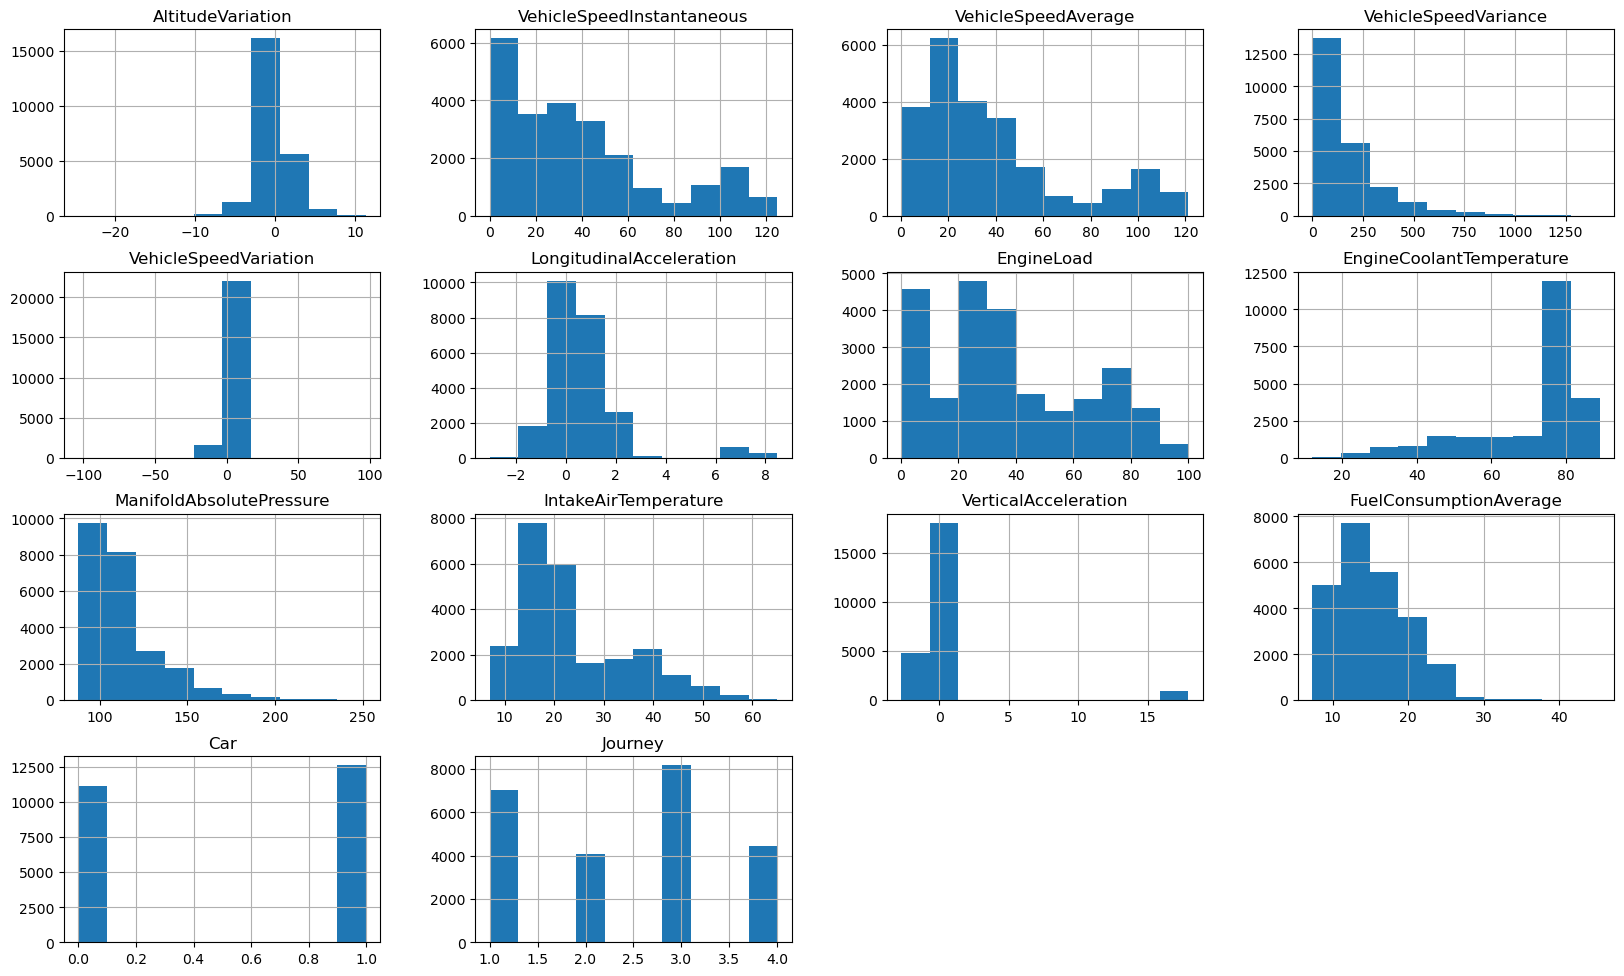

In [23]:
#visualise the features in histogram format before removing outliers

new_dataset.hist(layout=(5,4), figsize=(20,15))

plt.show()

### 2 Remove the outliers from each feature

In [24]:
#create a function to remove the outliers

df = pd.DataFrame(new_dataset)

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, threshold=1.5):
    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remove rows with outliers
    df_no_outliers = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

    return df_no_outliers

# Call the function to remove outliers
df_no_outliers = remove_outliers_iqr(df, threshold=1.5)

In [25]:
# Boxplot to visualize Data using a function 

def boxplot(df_no_outliers,feature):
    df_no_outliers.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

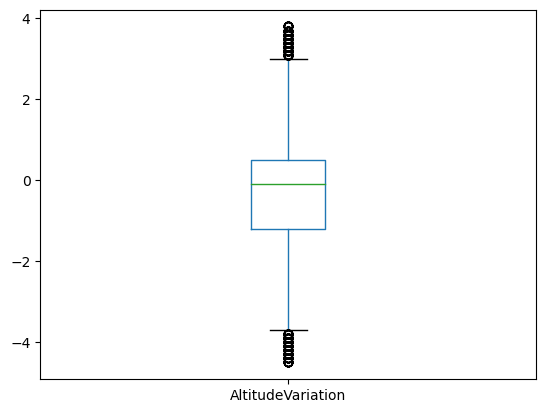

None


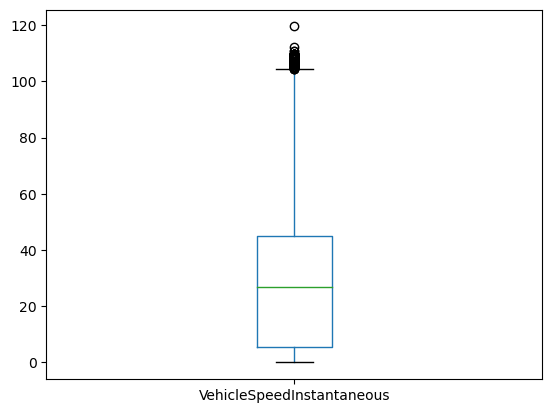

None


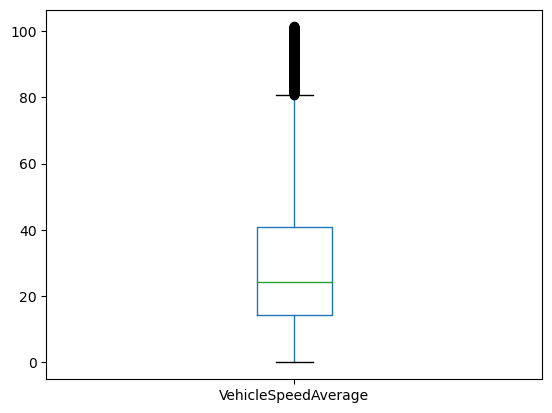

None


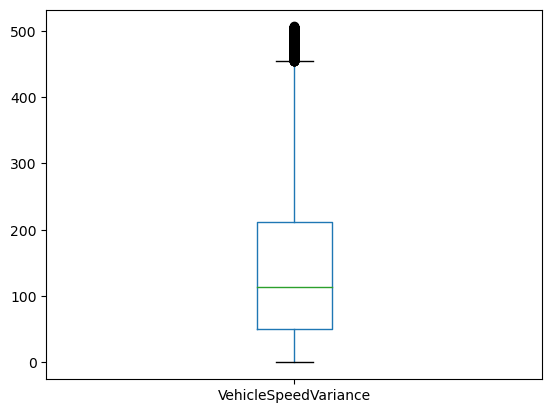

None


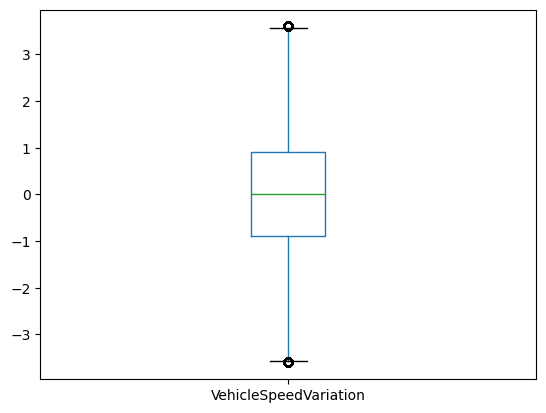

None


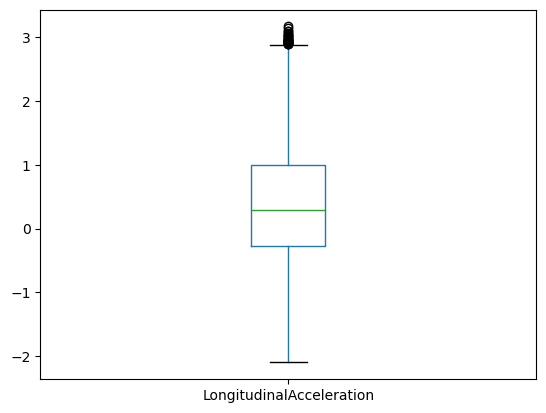

None


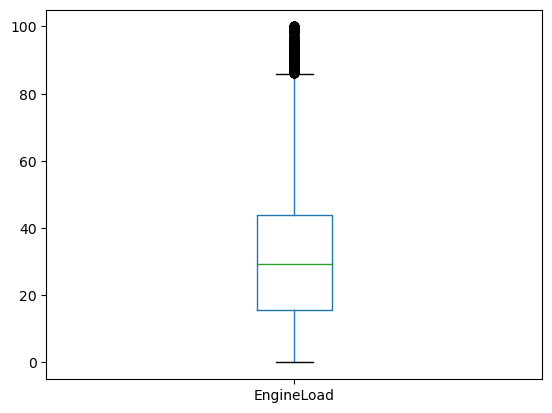

None


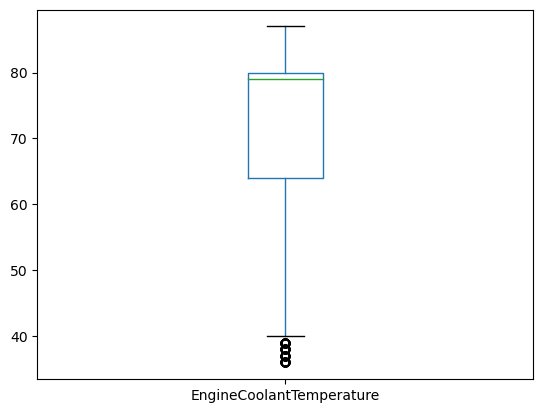

None


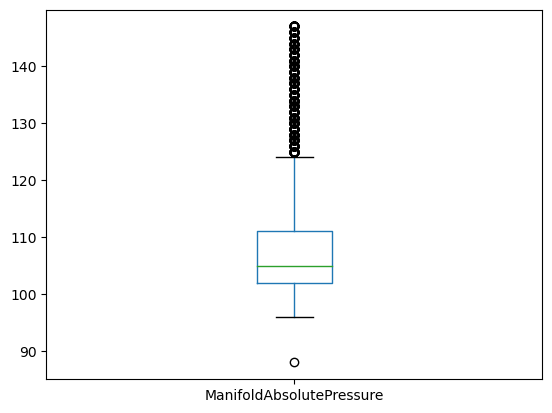

None


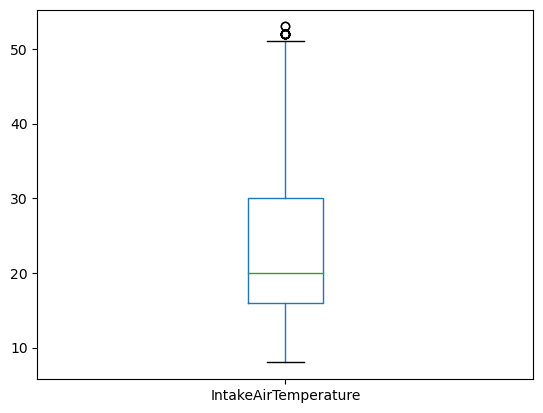

None


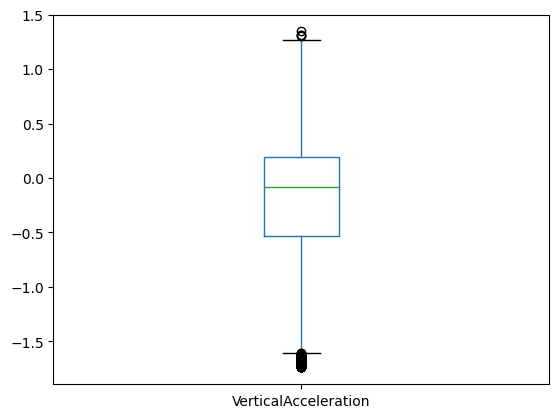

None


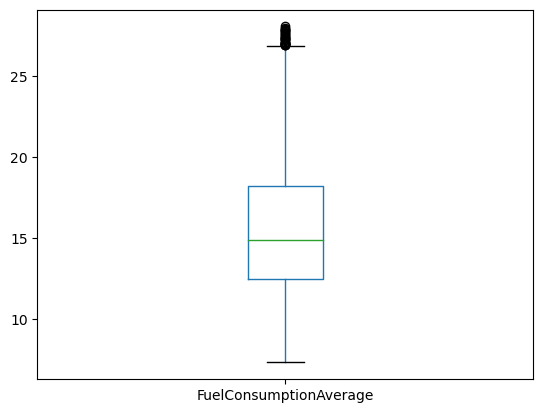

None


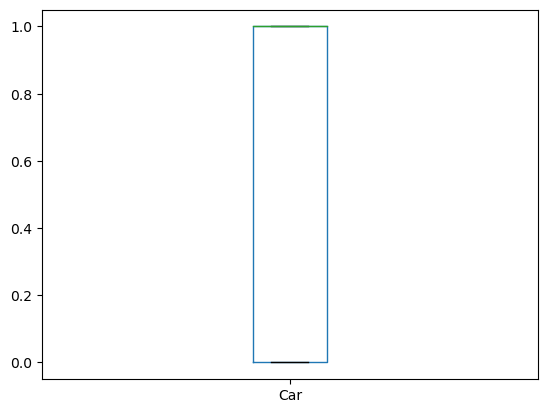

None


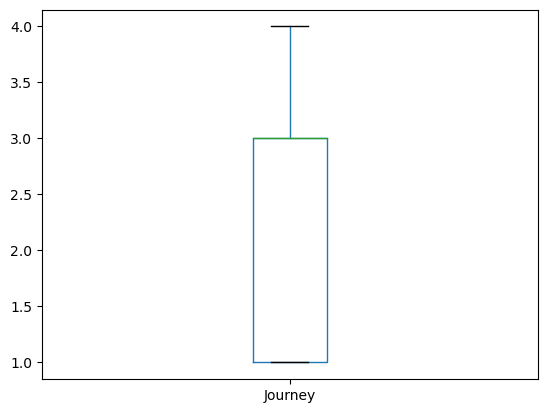

None


In [26]:
#create boxplots for each feature to check for outliers again

for feature in df_no_outliers:
    print(boxplot(df_no_outliers,feature))

### 3 Review the dataset after the outliers have been removed

In [27]:
#check the dataset after removal of outliers via IQR

df_no_outliers.shape

(15062, 14)

This resulted in a reduction in the dataset to leave 63% (15062/23770 x 100) records

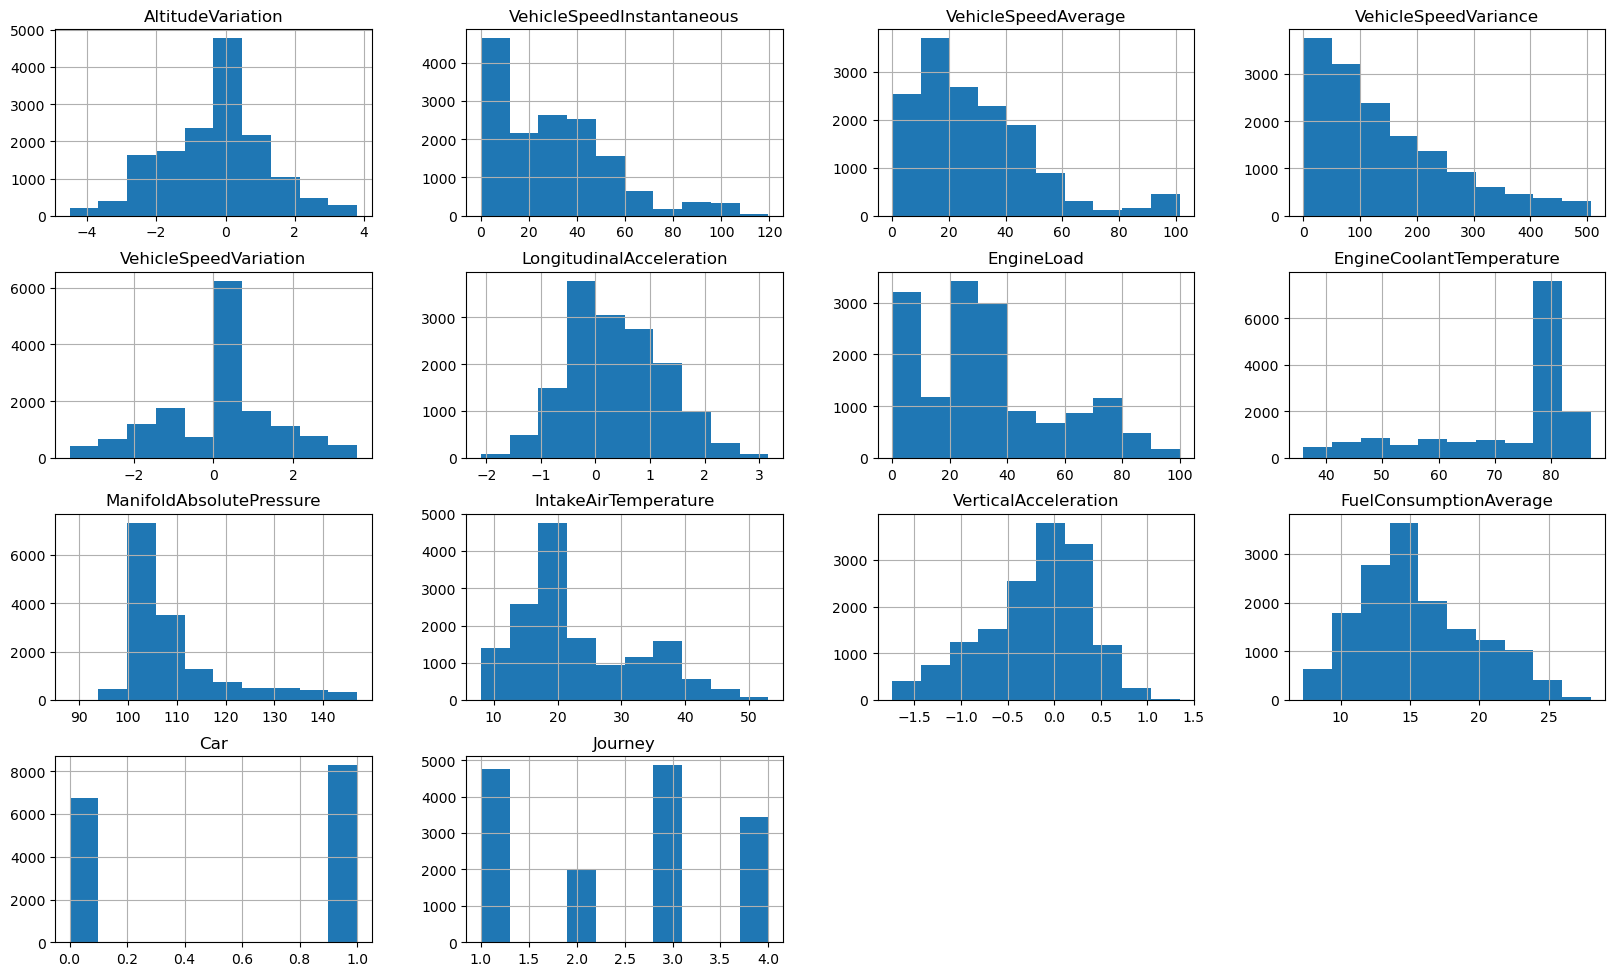

In [29]:
#visualise the features in histogram format after removing outliers Note: shape does not change after removing outliers

df_no_outliers.hist(layout=(5,4), figsize=(20,15))

plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

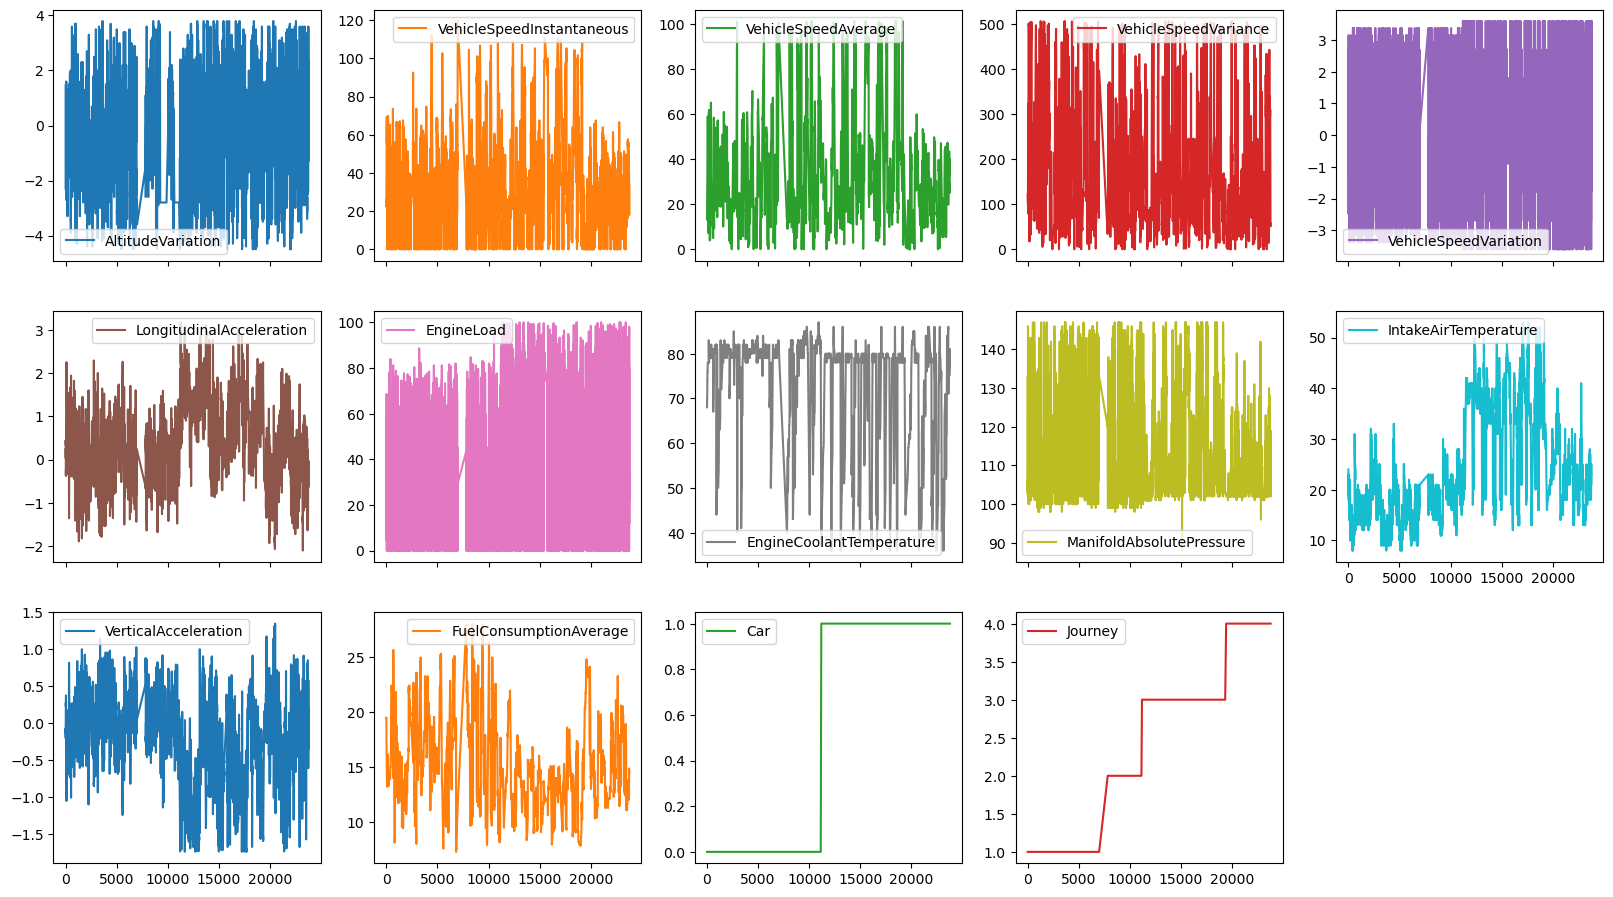

In [30]:
#visualise the plots of each feature after removal of outliers

df_no_outliers.plot(subplots=True, layout=(4,5), figsize=(20,15))

In [31]:
#check the parameters for the revised dataset

df_no_outliers.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
count,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.00000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000
mean,-0.320529,29.279122,29.218030,145.174728,0.009229,0.371484,32.548708,71.816558,109.14925,22.969858,-0.196887,15.486597,0.551188,2.463551
std,1.495935,25.447507,21.251911,117.795082,1.434002,0.868683,24.586986,13.027753,10.69832,9.339776,0.549763,4.118056,0.497389,1.155625
min,-4.500000,0.000000,0.000000,0.000000,-3.600002,-2.101800,0.000000,36.000000,88.00000,8.000000,-1.740200,7.307876,0.000000,1.000000
25%,-1.200012,5.400000,14.227623,50.828606,-0.900000,-0.273000,15.686275,64.000000,102.00000,16.000000,-0.528850,12.471350,0.000000,1.000000
50%,-0.099976,27.000000,24.422261,113.302748,0.000000,0.288000,29.411766,79.000000,105.00000,20.000000,-0.085000,14.875591,1.000000,3.000000
75%,0.500000,45.000000,40.828782,212.241537,0.899998,0.992100,43.921570,80.000000,111.00000,30.000000,0.191400,18.232169,1.000000,3.000000
max,3.800049,119.570579,101.354997,506.421168,3.600002,3.171200,100.000000,87.000000,147.00000,53.000000,1.346200,28.054390,1.000000,4.000000


The table illustrates the different value ranges, mean,max, min, standard deviations. Different magnitudes and scales. So the next step is to standardise the dataset features.